<a href="https://colab.research.google.com/github/nagasai17/Tarp-project/blob/master/Disease_Prediction_from_Symptoms_checkpoint123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Disease Prediction from Symptoms

For this project, we'll be using the dataset from here: http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html

Copy the data from all the columns and paste it into an excel sheet -> `raw_data.xlsx`

In [2]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Read Raw Dataset
df = pd.read_excel('/content/raw_data.xlsx')

In [9]:
df.head()

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,NaN,NaN,UMLS:C0392680_shortness of breath
2,NaN,NaN,UMLS:C0012833_dizziness
3,NaN,NaN,UMLS:C0004093_asthenia
4,NaN,NaN,UMLS:C0085639_fall


In [10]:
# Fill all NaN with the values above
data = df.fillna(method='ffill')

In [11]:
data.head()

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0392680_shortness of breath
2,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0012833_dizziness
3,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0004093_asthenia
4,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0085639_fall


In [12]:
# Process Disease and Symptom Names
def process_data(data):
    data_list = []
    data_name = data.replace('^','_').split('_')
    n = 1
    for names in data_name:
        if (n % 2 == 0):
            data_list.append(names)
        n += 1
    return data_list

In [13]:
# Data Cleanup
disease_list = []
disease_symptom_dict = defaultdict(list)
disease_symptom_count = {}
count = 0

for idx, row in data.iterrows():
    if(idx==1):
       print(idx,row)
    # Get the Disease Names
    if (row['Disease'] !="\xc2\xa0") and (row['Disease'] != ""):
        disease = row['Disease']
        disease_list = process_data(data=disease)
        count = row['Count of Disease Occurrence']

    # Get the Symptoms Corresponding to Diseases
    if (row['Symptom'] !="\xc2\xa0") and (row['Symptom'] != ""):
        symptom = row['Symptom']
        symptom_list = process_data(data=symptom)
        for d in disease_list:
            for s in symptom_list:
                disease_symptom_dict[d].append(s)
            disease_symptom_count[d] = count

1 Disease                        UMLS:C0020538_hypertensive disease
Count of Disease Occurrence                                  3363
Symptom                         UMLS:C0392680_shortness of breath
Name: 1, dtype: object


In [14]:
# See that the data is Processed Correctly
disease_symptom_dict

defaultdict(list,
            {"Alzheimer's disease": ['drool',
              'agitation',
              'nightmare',
              'rhonchus',
              'consciousness clear',
              'pin-point pupils',
              'bedridden',
              'bedridden',
              'frail',
              'tremor resting',
              'hyperkalemia',
              'facial paresis',
              'groggy',
              'muscle twitch',
              'wheelchair bound',
              'tremor',
              'cough',
              'fever'],
             'HIV': ['fever',
              'night sweat',
              'spontaneous rupture of membranes',
              'cough',
              '',
              'decreased body weight',
              'chill',
              'diarrhea',
              'pleuritic pain',
              'patient non compliance',
              'tachypnea',
              'productive cough',
              'muscle hypotonia',
              'hypotonic',
              'feeling

In [15]:
# Count of Disease Occurence w.r.t each Disease
disease_symptom_count

{"Alzheimer's disease": 101.0,
 'HIV': 350.0,
 'Pneumocystis\xa0carinii\xa0pneumonia': 113.0,
 'accident\xa0cerebrovascular': 885.0,
 'acquired\xa0immuno-deficiency syndrome': 350.0,
 'adenocarcinoma': 166.0,
 'adhesion': 57.0,
 'affect labile': 45.0,
 'anemia': 544.0,
 'anxiety state': 390.0,
 'aphasia': 76.0,
 'arthritis': 179.0,
 'asthma': 835.0,
 'bacteremia': 142.0,
 'benign prostatic hypertrophy': 192.0,
 'biliary calculus': 61.0,
 'bipolar disorder': 241.0,
 'bronchitis': 172.0,
 'candidiasis': 99.0,
 'carcinoma': 269.0,
 'carcinoma breast': 152.0,
 'carcinoma colon': 94.0,
 'carcinoma of lung': 86.0,
 'carcinoma prostate': 163.0,
 'cardiomyopathy': 283.0,
 'cellulitis': 341.0,
 'cholecystitis': 66.0,
 'cholelithiasis': 61.0,
 'chronic alcoholic intoxication': 70.0,
 'chronic kidney failure': 280.0,
 'chronic obstructive airway disease': 524.0,
 'cirrhosis': 218.0,
 'colitis': 114.0,
 'confusion': 408.0,
 'coronary arteriosclerosis': 1284.0,
 'coronary heart disease': 1284.0,
 '

In [16]:
# Save cleaned data as CSV
f = open('/content/cleaned_data.csv', 'w')

with f:
    writer = csv.writer(f)
    for key, val in disease_symptom_dict.items():
        for i in range(len(val)):
            writer.writerow([key, val[i], disease_symptom_count[key]])

In [17]:
# Read Cleaned Data as DF
df = pd.read_csv('/content/cleaned_data.csv')
df.columns = ['disease', 'symptom', 'occurence_count']
df.head()

,disease,symptom,occurence_count
0,hypertensive disease,shortness of breath,3363.0
1,hypertensive disease,dizziness,3363.0
2,hypertensive disease,asthenia,3363.0
3,hypertensive disease,fall,3363.0
4,hypertensive disease,syncope,3363.0


In [18]:
# Remove any rows with empty values
df.replace(float('nan'), np.nan, inplace=True)
df.dropna(inplace=True)

In [ ]:
from sklearn import preprocessing

In [19]:
n_unique = len(df['symptom'].unique())
n_unique

404

In [20]:
df.dtypes

disease             object
symptom             object
occurence_count    float64
dtype: object

In [22]:
# Encode the Labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['symptom'])
print(integer_encoded)

[328  87  28 ... 361 130 122]


In [23]:
# One Hot Encode the Labels
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
onehot_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
len(onehot_encoded[0])

404

In [25]:
cols = np.asarray(df['symptom'].unique())
cols

array(['shortness of breath', 'dizziness', 'asthenia', 'fall', 'syncope',
       'vertigo', 'sweat', 'sweating increased', 'palpitation', 'nausea',
       'angina pectoris', 'pressure chest', 'polyuria', 'polydypsia',
       'pain chest', 'orthopnea', 'rale', 'unresponsiveness',
       'mental status changes', 'vomiting', 'labored breathing',
       'feeling suicidal', 'suicidal', 'hallucinations auditory',
       'feeling hopeless', 'weepiness', 'sleeplessness',
       'motor retardation', 'irritable mood', 'blackout',
       'mood depressed', 'hallucinations visual', 'worry', 'agitation',
       'tremor', 'intoxication', 'verbal auditory hallucinations',
       'energy increased', 'difficulty', 'nightmare',
       'unable to concentrate', 'homelessness', 'hypokinesia',
       'dyspnea on exertion', 'chest tightness', 'cough', 'fever',
       'decreased translucency', 'productive cough', 'pleuritic pain',
       'yellow sputum', 'breath sounds decreased', 'chill', 'rhonchus',
       '

In [26]:
# Create a new dataframe to save OHE labels
df_ohe = pd.DataFrame(columns = cols)
df_ohe.head()

,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,nausea,angina pectoris,pressure chest,polyuria,polydypsia,pain chest,orthopnea,rale,unresponsiveness,mental status changes,vomiting,labored breathing,feeling suicidal,suicidal,hallucinations auditory,feeling hopeless,weepiness,sleeplessness,motor retardation,irritable mood,blackout,mood depressed,hallucinations visual,worry,agitation,tremor,intoxication,verbal auditory hallucinations,energy increased,difficulty,nightmare,...,scleral icterus,retch,blanch,elation,verbally abusive behavior,transsexual,behavior showing increased motor activity,coordination abnormal,choke,bowel sounds decreased,no known drug allergies,low back pain,charleyhorse,sedentary,feels hot/feverish,flare,pericardial friction rub,hoard,panic,cardiovascular finding,cardiovascular event,soft tissue swelling,rhd positive,para 1,nasal flaring,sneeze,hypertonicity,Murphy's sign,flatulence,gasping for breath,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts


In [27]:
for i in range(len(onehot_encoded)):
    df_ohe.loc[i] = onehot_encoded[i]

In [ ]:
df_ohe.head()

,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,nausea,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(df_ohe)

2127

In [28]:
# Disease Dataframe
df_disease = df['disease']
df_disease.head()

0    hypertensive disease
1    hypertensive disease
2    hypertensive disease
3    hypertensive disease
4    hypertensive disease
Name: disease, dtype: object

In [29]:
# Concatenate OHE Labels with the Disease Column
df_concat = pd.concat([df_disease,df_ohe], axis=1)
df_concat.head()

,disease,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,nausea,angina pectoris,pressure chest,polyuria,polydypsia,pain chest,orthopnea,rale,unresponsiveness,mental status changes,vomiting,labored breathing,feeling suicidal,suicidal,hallucinations auditory,feeling hopeless,weepiness,sleeplessness,motor retardation,irritable mood,blackout,mood depressed,hallucinations visual,worry,agitation,tremor,intoxication,verbal auditory hallucinations,energy increased,difficulty,...,scleral icterus,retch,blanch,elation,verbally abusive behavior,transsexual,behavior showing increased motor activity,coordination abnormal,choke,bowel sounds decreased,no known drug allergies,low back pain,charleyhorse,sedentary,feels hot/feverish,flare,pericardial friction rub,hoard,panic,cardiovascular finding,cardiovascular event,soft tissue swelling,rhd positive,para 1,nasal flaring,sneeze,hypertonicity,Murphy's sign,flatulence,gasping for breath,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_concat.drop_duplicates(keep='first',inplace=True)

In [ ]:
df_concat.head()

,disease,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,nausea,angina pectoris,pressure chest,polyuria,polydypsia,pain chest,orthopnea,rale,unresponsiveness,mental status changes,vomiting,labored breathing,feeling suicidal,suicidal,hallucinations auditory,feeling hopeless,weepiness,sleeplessness,motor retardation,irritable mood,blackout,mood depressed,hallucinations visual,worry,agitation,tremor,intoxication,verbal auditory hallucinations,energy increased,difficulty,...,scleral icterus,retch,blanch,elation,verbally abusive behavior,transsexual,behavior showing increased motor activity,coordination abnormal,choke,bowel sounds decreased,no known drug allergies,low back pain,charleyhorse,sedentary,feels hot/feverish,flare,pericardial friction rub,hoard,panic,cardiovascular finding,cardiovascular event,soft tissue swelling,rhd positive,para 1,nasal flaring,sneeze,hypertonicity,Murphy's sign,flatulence,gasping for breath,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(df_concat)

2098

In [31]:
cols = df_concat.columns
cols

Index(['disease', 'shortness of breath', 'dizziness', 'asthenia', 'fall',
       'syncope', 'vertigo', 'sweat', 'sweating increased', 'palpitation',
       ...
       'feces in rectum', 'prodrome', 'hypoproteinemia',
       'alcohol binge episode', 'abdomen acute', 'air fluid level',
       'catching breath', 'large-for-dates fetus', 'immobile',
       'homicidal thoughts'],
      dtype='object', length=405)

In [32]:
cols=cols[1:]

In [33]:
# Since, every disease has multiple symptoms, combine all symptoms per disease per row
df_concat = df_concat.groupby('disease').sum()
df_concat = df_concat.reset_index()
df_concat[:5]

,disease,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,nausea,angina pectoris,pressure chest,polyuria,polydypsia,pain chest,orthopnea,rale,unresponsiveness,mental status changes,vomiting,labored breathing,feeling suicidal,suicidal,hallucinations auditory,feeling hopeless,weepiness,sleeplessness,motor retardation,irritable mood,blackout,mood depressed,hallucinations visual,worry,agitation,tremor,intoxication,verbal auditory hallucinations,energy increased,difficulty,...,scleral icterus,retch,blanch,elation,verbally abusive behavior,transsexual,behavior showing increased motor activity,coordination abnormal,choke,bowel sounds decreased,no known drug allergies,low back pain,charleyhorse,sedentary,feels hot/feverish,flare,pericardial friction rub,hoard,panic,cardiovascular finding,cardiovascular event,soft tissue swelling,rhd positive,para 1,nasal flaring,sneeze,hypertonicity,Murphy's sign,flatulence,gasping for breath,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,Alzheimer's disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,HIV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pneumocystis carinii pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,accident cerebrovascular,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,acquired immuno-deficiency syndrome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(df_concat)

149

In [34]:
df_concat.to_csv("/content/training_dataset.csv", index=False)

In [35]:
# One Hot Encoded Features
X = df_concat[cols]

# Labels
y = df_concat['disease']

## Model Training

##Let' s   Start with Decision tree classifier

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [70]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [72]:
len(X_train), len(y_train)


(74, 74)

In [71]:
len(X_test), len(y_test)

(75, 75)

In [73]:
dt = DecisionTreeClassifier()
clf_dt=dt.fit(X, y)

In [74]:
clf_dt.score(X, y)

0.9731543624161074

In [75]:
disease_pred = clf_dt.predict(X)
y_pred =clf_dt.predict(X_test)

In [76]:
disease_real = y.values
from sklearn.metrics  import accuracy_score
print(accuracy_score(y_pred,y_test))


0.9866666666666667


In [77]:
#so cool done with decision tree.


for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: coronary arteriosclerosis
Actual: coronary heart disease

Pred: depression mental
Actual: depressive disorder

Pred: malignant neoplasms
Actual: primary malignant neoplasm

Pred: septicemia
Actual: systemic infection



0.9731543624161074

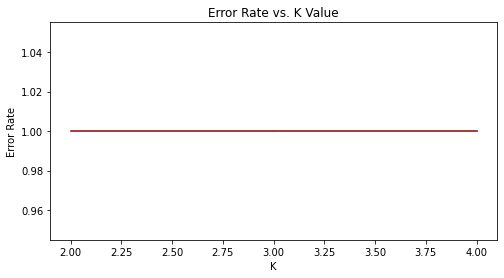

In [79]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

error_rate = []
for i in range(2,5):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(8,4))
plt.plot(range(2,5),error_rate,color='darkred', marker='o',markersize=0.1)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Create KNN Classifier
knn1 = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn1.fit(X,y)

#Predict the response for test dataset
# y_predwithknn = knn1.predict(X_test)
# y_predwithknn
knn1.score(X,y)

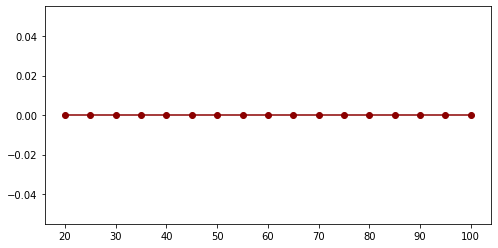

In [80]:
from sklearn.ensemble import RandomForestClassifier

results = []
n_estimaor_options = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
for trees in n_estimaor_options:
    model = RandomForestClassifier(trees,  random_state=101)
    model.fit(X_train, y_train)
    y_pred12 = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred12)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimaor_options).plot(color="darkred",marker="o")

In [85]:
rand=RandomForestClassifier(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
rand.fit(X,y)
rand.score(X,y)

# y_predwithrand=rand.predict(X_test)
# y_predwithrand

0.9731543624161074

,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,nausea,angina pectoris,pressure chest,polyuria,polydypsia,pain chest,orthopnea,rale,unresponsiveness,mental status changes,vomiting,labored breathing,feeling suicidal,suicidal,hallucinations auditory,feeling hopeless,weepiness,sleeplessness,motor retardation,irritable mood,blackout,mood depressed,hallucinations visual,worry,agitation,tremor,intoxication,verbal auditory hallucinations,energy increased,difficulty,nightmare,...,scleral icterus,retch,blanch,elation,verbally abusive behavior,transsexual,behavior showing increased motor activity,coordination abnormal,choke,bowel sounds decreased,no known drug allergies,low back pain,charleyhorse,sedentary,feels hot/feverish,flare,pericardial friction rub,hoard,panic,cardiovascular finding,cardiovascular event,soft tissue swelling,rhd positive,para 1,nasal flaring,sneeze,hypertonicity,Murphy's sign,flatulence,gasping for breath,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,

Done with all Classifiers , Lets Visualise it!!!!!!


In [ ]:
#Visualiser

